In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import plotly.express as px

In [2]:
# 1. LOADING THE DATSET 
df= pd.read_csv('drug_abuse_data.csv')
df

,state,state_code,year,drug_deaths,population,labor_force,employment,unemployment,unemployment_rate,cpi_all_urban_consumers,gdp_per_capita
0,Alabama,1,1999,195,4430141,2140296,2038889,101407,4.7,166.600,33106
1,Alabama,1,2000,232,4447100,2133223,2035594,97629,4.6,172.200,33106
2,Alabama,1,2001,253,4467634,2115401,2006884,108517,5.1,177.100,33312
3,Alabama,1,2002,248,4480089,2106161,1981919,124242,5.9,179.900,34068
4,Alabama,1,2003,255,4503491,2120225,1992732,127493,6.0,184.000,34855
...,...,...,...,...,...,...,...,...,...,...,...
913,Wyoming,56,2012,99,576412,307267,290932,16335,5.3,229.594,60777
914,Wyoming,56,2013,99,582658,306608,292131,14477,4.7,232.957,60770
915,Wyoming,56,2014,112,584153,306331,293657,12674,4.1,236.736,60900
916,Wyoming,56,2015,99,586107,304775,291686,13089,4.3,237.017,60979


In [3]:
# 2. Checking the shape and size of Data set 
df.shape
rows,cols=df.shape
print('Number of Rows :',rows)
print('Number of Columns :',cols)

Number of Rows : 918
Number of Columns : 11


In [4]:
df.size   #Overall Values 

10098

In [5]:
df1=df.rename(columns={'state':'state','state_code':'s_code','year':'year','drug_deaths':'drg_deaths','population':'popu','labor_force':'l_f','employment':'emp','unemployment':'unemp','cpi_all_urban_consumers':'cpi','gdp_per_capita':'gdp'})
df1

,state,s_code,year,drg_deaths,popu,l_f,emp,unemp,unemployment_rate,cpi,gdp
0,Alabama,1,1999,195,4430141,2140296,2038889,101407,4.7,166.600,33106
1,Alabama,1,2000,232,4447100,2133223,2035594,97629,4.6,172.200,33106
2,Alabama,1,2001,253,4467634,2115401,2006884,108517,5.1,177.100,33312
3,Alabama,1,2002,248,4480089,2106161,1981919,124242,5.9,179.900,34068
4,Alabama,1,2003,255,4503491,2120225,1992732,127493,6.0,184.000,34855
...,...,...,...,...,...,...,...,...,...,...,...
913,Wyoming,56,2012,99,576412,307267,290932,16335,5.3,229.594,60777
914,Wyoming,56,2013,99,582658,306608,292131,14477,4.7,232.957,60770
915,Wyoming,56,2014,112,584153,306331,293657,12674,4.1,236.736,60900
916,Wyoming,56,2015,99,586107,304775,291686,13089,4.3,237.017,60979


In [6]:
#SUMMARY OF DATASETS
print(f""" There are {df1.state.nunique()} states are covered in the dataset and deaths in {df1.year.nunique()} years from {df1.year.min()} to {df1.year.max()} due to drugs are recorded. Overall {df1.drg_deaths.sum()} deaths are recorded in different states""")


 There are 51 states are covered in the dataset and deaths in 18 years from 1999 to 2016 due to drugs are recorded. Overall 680740 deaths are recorded in different states


In [7]:
# Drop The Unused Column 
df.drop('state_code',axis=1,inplace=True)
df

,state,year,drug_deaths,population,labor_force,employment,unemployment,unemployment_rate,cpi_all_urban_consumers,gdp_per_capita
0,Alabama,1999,195,4430141,2140296,2038889,101407,4.7,166.600,33106
1,Alabama,2000,232,4447100,2133223,2035594,97629,4.6,172.200,33106
2,Alabama,2001,253,4467634,2115401,2006884,108517,5.1,177.100,33312
3,Alabama,2002,248,4480089,2106161,1981919,124242,5.9,179.900,34068
4,Alabama,2003,255,4503491,2120225,1992732,127493,6.0,184.000,34855
...,...,...,...,...,...,...,...,...,...,...
913,Wyoming,2012,99,576412,307267,290932,16335,5.3,229.594,60777
914,Wyoming,2013,99,582658,306608,292131,14477,4.7,232.957,60770
915,Wyoming,2014,112,584153,306331,293657,12674,4.1,236.736,60900
916,Wyoming,2015,99,586107,304775,291686,13089,4.3,237.017,60979


In [8]:
d_f=df.groupby(['state'])
d_f

In [9]:
df1.min()

state                Alabama
s_code                     1
year                    1999
drg_deaths                13
popu                  491780
l_f                   262758
emp                   250605
unemp                   8074
unemployment_rate        2.3
cpi                    166.6
gdp                    28856
dtype: object

In [10]:
df1.describe()

,s_code,year,drg_deaths,popu,l_f,emp,unemp,unemployment_rate,cpi,gdp
count,918.000000,918.000000,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,918.000000,918.000000
mean,28.960784,2007.500000,741.546841,5.921292e+06,2.957883e+06,2.776227e+06,1.816554e+05,5.716776,206.782667,48098.793028
std,15.685381,5.190956,833.074622,6.631564e+06,3.253066e+06,3.032583e+06,2.409780e+05,1.985356,23.726850,17896.631888
min,1.000000,1999.000000,13.000000,4.917800e+05,2.627580e+05,2.506050e+05,8.074000e+03,2.300000,166.600000,28856.000000
25%,16.000000,2003.000000,168.000000,1.599830e+06,7.696502e+05,7.258050e+05,3.914950e+04,4.300000,184.000000,39598.250000
50%,29.000000,2007.500000,514.000000,4.131636e+06,1.991038e+06,1.869140e+06,1.092125e+05,5.300000,210.939500,44623.500000
75%,42.000000,2012.000000,963.500000,6.686474e+06,3.470114e+06,3.246838e+06,2.175358e+05,6.775000,229.594000,51409.750000
max,56.000000,2016.000000,5094.000000,3.925002e+07,1.909366e+07,1.804883e+07,2.244326e+06,13.700000,240.007000,170687.000000


In [11]:
df1.iloc[df1['drg_deaths'].idxmax()]

state                California
s_code                        6
year                       2016
drg_deaths                 5094
popu                   39250017
l_f                    19093658
emp                    18048827
unemp                   1044831
unemployment_rate           5.5
cpi                     240.007
gdp                       59117
Name: 89, dtype: object

In [12]:
df1.iloc[df1['drg_deaths'].idxmin()]

state                North Dakota
s_code                         38
year                         2005
drg_deaths                     13
popu                       646089
l_f                        355545
emp                        343508
unemp                       12037
unemployment_rate             3.4
cpi                         195.3
gdp                         41272
Name: 618, dtype: object

# -EDA

In [13]:

df.min()

state                      Alabama
year                          1999
drug_deaths                     13
population                  491780
labor_force                 262758
employment                  250605
unemployment                  8074
unemployment_rate              2.3
cpi_all_urban_consumers      166.6
gdp_per_capita               28856
dtype: object

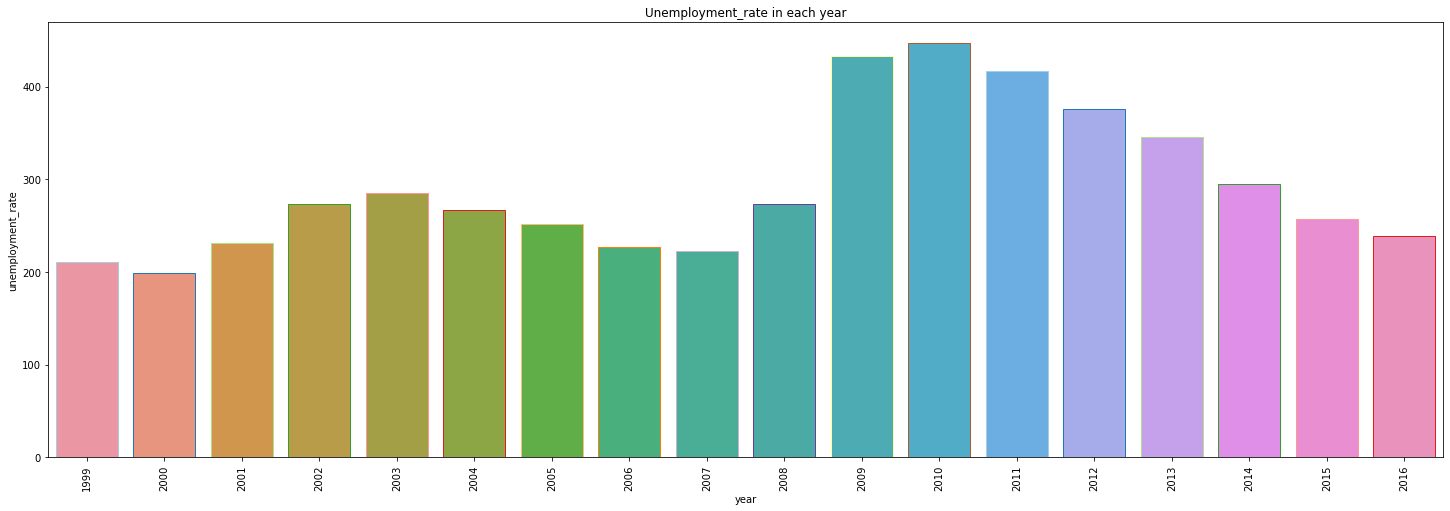

In [14]:
plt.figure(figsize=(25,8))
unemp_gdp=df.groupby('year').unemployment_rate.sum().to_frame().reset_index()
unemp_gdp.columns = ['year','unemployment_rate']
sns.barplot(y=unemp_gdp.unemployment_rate,x=unemp_gdp.year,edgecolor=sns.color_palette('Paired'))
plt.xticks(rotation=90)
plt.title('Unemployment_rate in each year')
plt.show()

In [15]:
fig=px.scatter(df,y='cpi_all_urban_consumers',x='year',color='drug_deaths')
fig.show()

In [16]:
#fig=px.bar(df,y='cpi_all_urban_consumers' , x='year' )

fig=px.pie(df,values='cpi_all_urban_consumers' , names='year' , width=900 , height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [17]:
fig=px.pie(df,values='drug_deaths' , names='state' , width=900 , height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

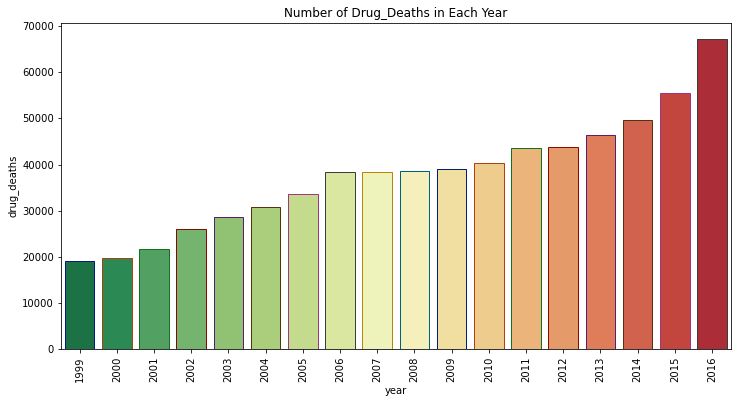

In [18]:
plt.figure(figsize=(12,6))
year_death=df.groupby('year').drug_deaths.sum().to_frame().reset_index()
year_death.columns = ['year','drug_deaths']
sns.barplot(x=year_death.year,y=year_death.drug_deaths,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
#sns.barplot(x=year_death.year,y=year_death.drug_deaths)
plt.xticks(rotation=90)
plt.title('Number of Drug_Deaths in Each Year')
plt.show()


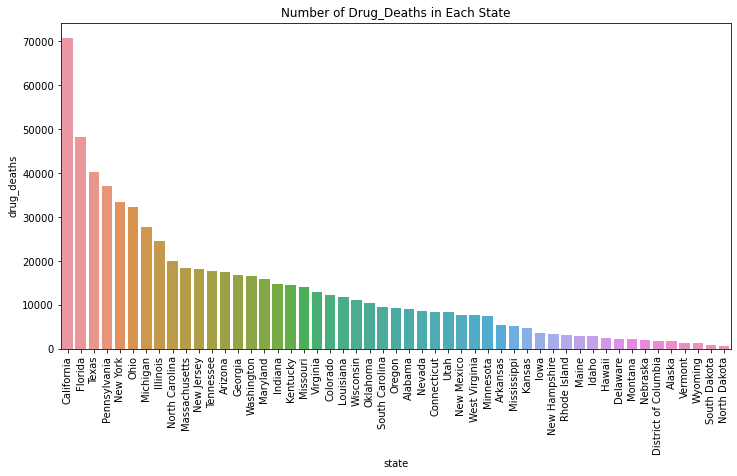

In [19]:
plt.figure(figsize=(12,6))
count_deaths=df.groupby('state').drug_deaths.sum().to_frame().reset_index().sort_values('drug_deaths',ascending=False)
#sns.barplot(x=count_deaths.state , y=count_deaths.drug_deaths,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
sns.barplot(x=count_deaths.state , y=count_deaths.drug_deaths)
plt.xticks(rotation=90)
plt.title("Number of Drug_Deaths in Each State")
plt.show()

In [20]:
corr=df.corr(method='pearson')
corr


,year,drug_deaths,population,labor_force,employment,unemployment,unemployment_rate,cpi_all_urban_consumers,gdp_per_capita
year,1.000000,0.278011,0.040287,0.031532,0.024321,0.119601,0.342828,0.993933,0.104967
drug_deaths,0.278011,1.000000,0.887804,0.883867,0.880805,0.847217,0.275715,0.272135,-0.030262
population,0.040287,0.887804,1.000000,0.999141,0.998488,0.922386,0.202155,0.040163,-0.028447
labor_force,0.031532,0.883867,0.999141,1.000000,0.999521,0.920982,0.194559,0.031847,-0.022146
employment,0.024321,0.880805,0.998488,0.999521,1.000000,0.908479,0.175005,0.024149,-0.022267
unemployment,0.119601,0.847217,0.922386,0.920982,0.908479,1.000000,0.424098,0.126023,-0.018743
unemployment_rate,0.342828,0.275715,0.202155,0.194559,0.175005,0.424098,1.000000,0.362932,0.065744
cpi_all_urban_consumers,0.993933,0.272135,0.040163,0.031847,0.024149,0.126023,0.362932,1.000000,0.106666
gdp_per_capita,0.104967,-0.030262,-0.028447,-0.022146,-0.022267,-0.018743,0.065744,0.106666,1.000000


In [21]:
plt.figure(figsize=(15,6))
corr.style.background_gradient(cmap='coolwarm')

,year,drug_deaths,population,labor_force,employment,unemployment,unemployment_rate,cpi_all_urban_consumers,gdp_per_capita
year,1.000000,0.278011,0.040287,0.031532,0.024321,0.119601,0.342828,0.993933,0.104967
drug_deaths,0.278011,1.000000,0.887804,0.883867,0.880805,0.847217,0.275715,0.272135,-0.030262
population,0.040287,0.887804,1.000000,0.999141,0.998488,0.922386,0.202155,0.040163,-0.028447
labor_force,0.031532,0.883867,0.999141,1.000000,0.999521,0.920982,0.194559,0.031847,-0.022146
employment,0.024321,0.880805,0.998488,0.999521,1.000000,0.908479,0.175005,0.024149,-0.022267
unemployment,0.119601,0.847217,0.922386,0.920982,0.908479,1.000000,0.424098,0.126023,-0.018743
unemployment_rate,0.342828,0.275715,0.202155,0.194559,0.175005,0.424098,1.000000,0.362932,0.065744
cpi_all_urban_consumers,0.993933,0.272135,0.040163,0.031847,0.024149,0.126023,0.362932,1.000000,0.106666
gdp_per_capita,0.104967,-0.030262,-0.028447,-0.022146,-0.022267,-0.018743,0.065744,0.106666,1.000000


<Figure size 1080x432 with 0 Axes>

<AxesSubplot:>

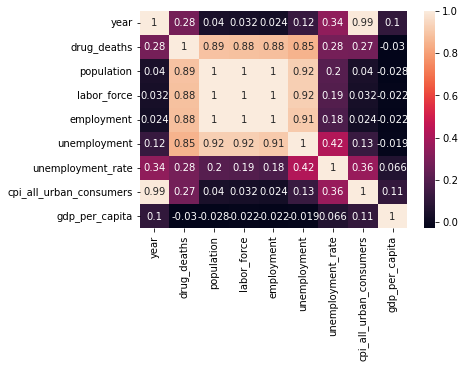

In [22]:
sns.heatmap(corr,annot=True)